In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\ADMIN\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\ADMIN\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\ADMIN\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
df= pd.read_csv('Classified Data', index_col=0)

In [5]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


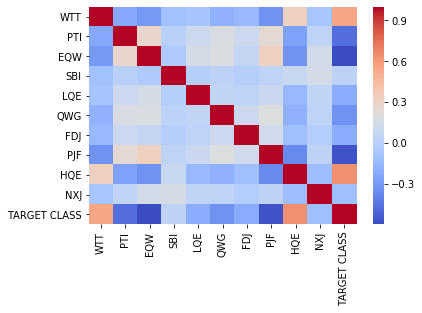

In [7]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [8]:
df.drop('SBI',axis=1,inplace=True)

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_array=ss.fit_transform(df.drop('TARGET CLASS', axis=1))

In [10]:
X=pd.DataFrame(data=scaled_array,columns=df.columns[:-1])

In [11]:
y=df['TARGET CLASS']

In [12]:
from sklearn.model_selection import train_test_split

C:\Users\ADMIN\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [13]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.3) 

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [17]:
ypred = knn.predict(X_test)

In [18]:
np.mean(ypred!=y_test)

0.06333333333333334

In [19]:
error_rate = []
for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    ypred = knn.predict(X_test)
    error_rate.append(np.mean(ypred!=y_test))

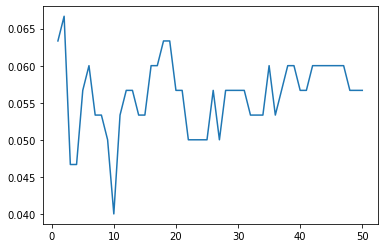

In [20]:
plt.plot(range(1,51),error_rate)

In [52]:
knn = KNeighborsClassifier(n_neighbors=10)

In [54]:
knn.fit(X_train, y_train)
ypred = knn.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(y_test,ypred)

array([[138,  12],
       [  5, 145]], dtype=int64)

In [23]:
12/300

0.04

In [24]:
10/300

0.03333333333333333